In [9]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import torch
import torch.nn as nn


In [10]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df['id'] = df.index
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,id
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,2
3,4.6,3.1,1.5,0.2,0.0,3
4,5.0,3.6,1.4,0.2,0.0,4


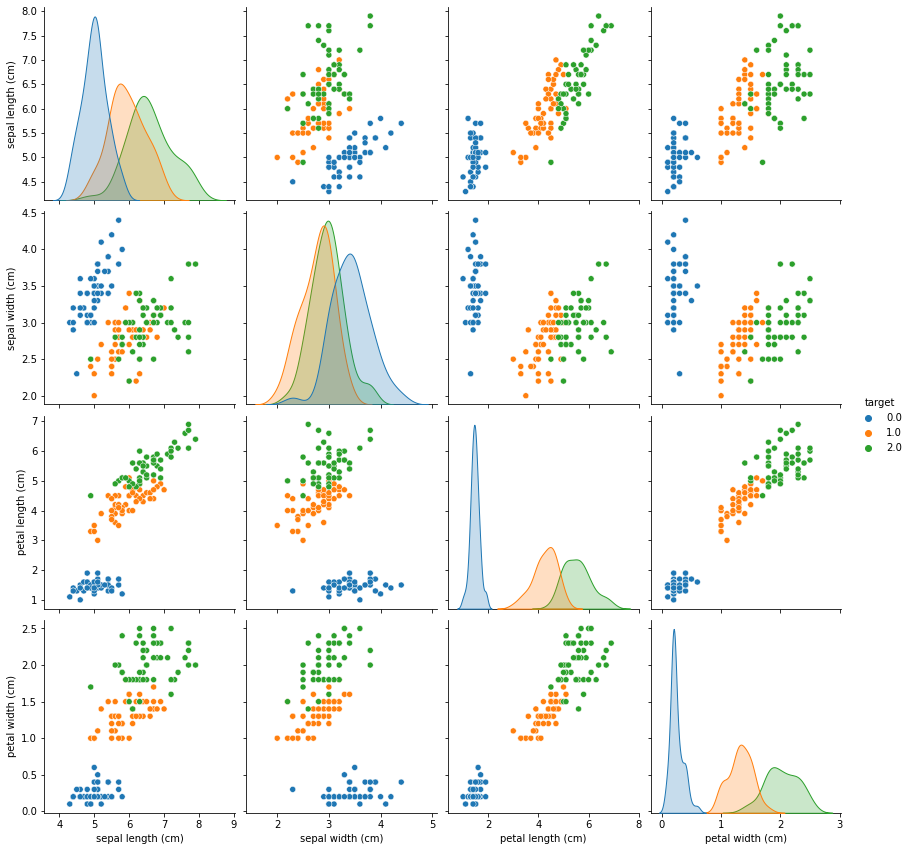

In [11]:
df_copy = df.copy()
df_copy.drop('id', inplace=True, axis=1)
sns.pairplot(df_copy, hue='target', height=3, palette = sns.color_palette("tab10",n_colors=3));

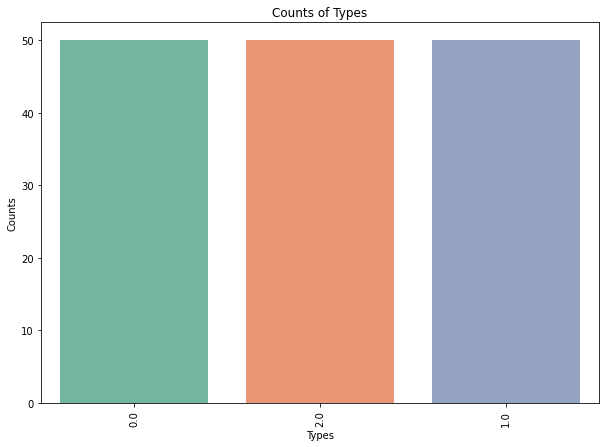

In [12]:
plt.figure(figsize= (10, 7))
sns.countplot(x = "target", data = df, palette = sns.color_palette("Set2", 18)
      , order=df['target'].value_counts().index)
plt.xlabel("Types")
plt.ylabel("Counts")
plt.title("Counts of Types")
plt.xticks(rotation = "vertical")
plt.show()

In [17]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [40]:
df_copy = df.copy()

# Get 10 random samples for test
test0 = df_copy.loc[df['target'] == 0].sample(10)
test1 = df_copy.loc[df['target'] == 1].sample(10)
test2 = df_copy.loc[df['target'] == 2].sample(10)

# Create test and train data
test_data_temp = test0.append(test1).append(test2)
train_data_temp = df.copy()

# Remove test data from data and generate train data
cond = train_data_temp['id'].isin(test_data_temp['id'])
train_data_temp.drop(train_data_temp[cond].index, inplace = True)

# Convert test and train into numbers
train_data = train_data_temp.to_numpy()
test_data = test_data_temp.to_numpy()

train_data_x = train_data[:,:4]
train_data_y = train_data[:,4]

test_data_x = test_data[:,:4]
test_data_y = test_data[:,4]

In [41]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_x = sc.fit_transform(train_data_x)
test_data_x = sc.transform(test_data_x)

In [42]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_data_x, train_data_y)

GaussianNB()

In [43]:
# Predicting the Test set results
y_pred = nvclassifier.predict(test_data_x)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2.]


In [44]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((test_data_y,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data_y, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [46]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333
